<a href="https://colab.research.google.com/github/vicalfayo09/steer_price_prediction_ml/blob/main/datasetloading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from google.colab import files

uploaded = files.upload()






TypeError: ignored

In [ ]:
import io
#path = './home/alfayo/Downloads/weeklycattleprice_en.xlsx'
# Reading the data from the CSV file
data = pd.read_excel(io.BytesIO(uploaded['weeklycattleprice_en.xlsx'])) 


In [ ]:
data.shape

(11, 24)

In [ ]:
data.columns

Index(['Unnamed: 0',
       'All price data is provided by John Jordan's Farm Market News Service',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', ' '],
      dtype='object')

In [ ]:
X , y = data.values[ : , 0 ] , data.values[ : , 1 ]
X = np.expand_dims( X , axis=1 )

# Fitting the linear regression model
regressor = LinearRegression()
regressor.fit( X , y )

# Make predictions
print( f'Prediction for 8.5 hours is {regressor.predict([[8.5]])[0]}' )

ValueError: ignored

In [ ]:
uploaded2 = files.upload()

Saving AJA01.20221011194750.csv to AJA01.20221011194750.csv


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data2 = pd.read_csv(io.BytesIO(uploaded2['AJA01.20221011194750.csv']))

In [ ]:
data2

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [ ]:
data2.head()

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks 200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks 250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks 300-349kg,Euro,238.29
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks 350-399kg,Euro,270.47
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks 400-449kg,Euro,302.43


In [ ]:
data2[data2['Type of Cattle'].str.contains('Bu')].count()

STATISTIC CODE    736
Statistic         736
TLIST(A1)         736
Year              736
C01782V02140      736
Type of Cattle    736
UNIT              736
VALUE             728
dtype: int64

In [ ]:
data2.count()

STATISTIC CODE    1288
Statistic         1288
TLIST(A1)         1288
Year              1288
C01782V02140      1288
Type of Cattle    1288
UNIT              1288
VALUE             1207
dtype: int64

In [ ]:
#data2['Type of Cattle'] = data2['Type of Cattle'].str.extract( r'\w(\d+\w)', expand=False ).split().astype(float)

In [ ]:
data2['Type of Cattle']

0       Bullocks 200-249kg
1       Bullocks 250-299kg
2       Bullocks 300-349kg
3       Bullocks 350-399kg
4       Bullocks 400-449kg
               ...        
1283     Heifers 250-299kg
1284     Heifers 300-349kg
1285     Heifers 350-399kg
1286     Heifers 400-449kg
1287    Cows for slaughter
Name: Type of Cattle, Length: 1288, dtype: object

In [15]:
import re
bullock = "Bullocks 200-250kg"
bullock_val_1 = re.findall('\w.(\d+[^A-Za-z]+\d+\w+)', bullock)

In [108]:
bullock_val_1

['200-250kg']

In [ ]:
df = pd.DataFrame(data2)

In [ ]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks 200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks 250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks 300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks 350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks 400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers 250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers 300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers 350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers 400-449kg,Euro,216.796269


In [ ]:
initial_columns = df.columns
initial_columns

Index(['STATISTIC CODE', 'Statistic', 'TLIST(A1)', 'Year', 'C01782V02140',
       'Type of Cattle', 'UNIT', 'VALUE'],
      dtype='object')

In [ ]:
col_names = []
for old in df.columns:
    new = re.sub( r"[,]" ,'',old.strip()) 
    new = re.sub( r"[\n\s/]" ,'_',new) 
    col_names.append(new.lower()) 
df.rename(columns=dict(zip(df.columns, col_names)), )

,statistic_code,statistic,tlist(a1),year,c01782v02140,type_of_cattle,unit,value
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks 200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks 250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks 300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks 350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks 400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers 250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers 300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers 350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers 400-449kg,Euro,216.796269


In [ ]:
for weight in df["Type of Cattle"]:
  bullock_val_2 = re.findall('\w.(\d+[^A-Za-z]+\d+\w+)', weight)

In [ ]:
df.insert(6, "Weight", bullock_val_2, True)

ValueError: ignored

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#https://drive.google.com/file/d/1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT'})

In [5]:
fileDownloaded.GetContentFile('AJA01.20221011194750.csv')

In [47]:
import pandas as pd
df = pd.read_csv('AJA01.20221011194750.csv')

df.head()

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks 200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks 250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks 300-349kg,Euro,238.29
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks 350-399kg,Euro,270.47
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks 400-449kg,Euro,302.43


In [48]:
df.describe(include="all")

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
count,1288,1288,1288.000000,1288.000000,1288,1288,1288,1207.000000
unique,2,2,NaN,NaN,14,14,1,NaN
top,AJA01C1,Cattle Price per Head,NaN,NaN,B200,Bullocks 200-249kg,Euro,NaN
freq,644,644,NaN,NaN,92,92,1288,NaN
mean,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,369.926001
std,NaN,NaN,13.281075,13.281075,NaN,NaN,NaN,258.764418
min,NaN,NaN,1976.000000,1976.000000,NaN,NaN,NaN,46.240000
25%,NaN,NaN,1987.000000,1987.000000,NaN,NaN,NaN,154.950000
50%,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,228.073462
75%,NaN,NaN,2010.000000,2010.000000,NaN,NaN,NaN,560.516376


In [49]:
df.isna().sum()

STATISTIC CODE     0
Statistic          0
TLIST(A1)          0
Year               0
C01782V02140       0
Type of Cattle     0
UNIT               0
VALUE             81
dtype: int64

In [50]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


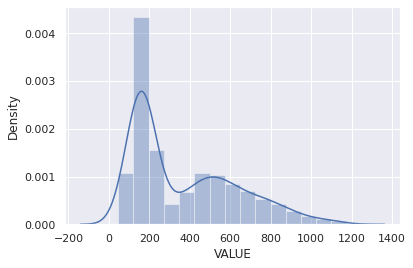

In [51]:
sns.distplot(df['VALUE'])

In [52]:
new = df['Type of Cattle'].str.split(" ", n = 1, expand=True)

In [53]:
df['Type of Cattle'] = new[0]
df.insert(6, "Weight", new[1])

In [54]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400-449kg,Euro,216.796269


In [67]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

x = df['Weight']
y = df['VALUE']
newprice = df.iloc[:, 8].values


In [77]:
price = newprice.reshape(-1, 1)
price

array([[         nan],
       [         nan],
       [238.29      ],
       ...,
       [216.96599474],
       [216.79626892],
       [         nan]])

In [78]:
#To calculate the median use imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(price)
y = imputer.transform(price)
print(y)

[[228.07346206]
 [228.07346206]
 [238.29      ]
 ...
 [216.96599474]
 [216.79626892]
 [228.07346206]]


In [83]:
df['VALUE'] = y

In [84]:
df.isna().sum()

STATISTIC CODE    0
Statistic         0
TLIST(A1)         0
Year              0
C01782V02140      0
Type of Cattle    0
Weight            0
UNIT              0
VALUE             0
dtype: int64

In [85]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200-249kg,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250-299kg,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400-449kg,Euro,216.796269


In [94]:
df['Type of Cattle'] = df['Type of Cattle'].replace("Cows", "Bullocks")
df['Weight'] = df['Weight'].replace("for slaughter", "_")

In [95]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200-249kg,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250-299kg,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400-449kg,Euro,216.796269


In [101]:
df.rename(columns = {'Weight': 'Weight in kg'}, inplace=True)

In [102]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200-249kg,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250-299kg,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400-449kg,Euro,216.796269


In [99]:
sns.distplot()

TypeError: ignored

In [104]:
df['Weight in kg']

'200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg250-299kg300-349kg350-399kg400-449kg_200-249kg250-299kg300-349kg350-399kg400-449kg450-499kg500-549kg550kg+200-249kg2

In [105]:
type(df['Weight in kg'])

pandas.core.series.Series

In [107]:
df.dtypes

STATISTIC CODE     object
Statistic          object
TLIST(A1)           int64
Year                int64
C01782V02140       object
Type of Cattle     object
Weight in kg       object
UNIT               object
VALUE             float64
dtype: object

In [109]:
import re
for x in df['Weight in kg']:
  if('\w+'){
      
  }

SyntaxError: ignored

In [ ]:
df2 = df.copy()
df2 = df2.astype({})